In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Data Preparation

In [2]:
df = pd.read_csv(r"C:\Users\suvab\OneDrive\Documents\alldata.csv\alldata.csv")
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [3]:
print(df.shape,"\nThis dataset contains: 6964 rows and 5 columns.")

(6964, 5) 
This dataset contains: 6964 rows and 5 columns.


### Data Cleaning

In [4]:
#check if there any NaNs in the data
df.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [5]:
#Drop reviews column from the dataset
df.drop(columns = "reviews",inplace = True)

In [6]:
df.dropna(inplace=True)

In [7]:
#after removing null values
df.isnull().sum()

position       0
company        0
description    0
location       0
dtype: int64

### Add New Columns

In [8]:
#Create city and state columns to better aggregate the data
df['location'] = df.location.apply(lambda x : re.sub('\d*','',str(x)))
df['city'] = df.location.apply(lambda x : x.split(',')[0].strip())
df['state'] = df.location.apply(lambda x :x.split(',')[1].strip())
df['location'] = df['city'] + ', ' + df['state']
df.head()

,position,company,description,location,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",Atlanta,GA


### Exploratory Data Analysis

* What are the most common job to appear when searching for 'Data Science'?
* Which company hire the most Data Science job?
* From the data, which cities and state hire the most?

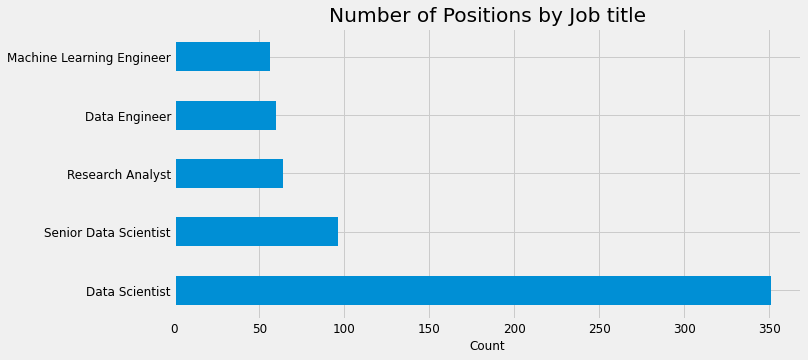

In [17]:
viz_df = df['position'].value_counts().head()
viz_df.plot(kind='barh',figsize = (10,5))
plt.xlabel('Count',size=12)
plt.ylabel('')
plt.yticks(size=12)
plt.xticks(size=12)
plt.title("Number of Positions by Job title")
plt.style.use('fivethirtyeight')
plt.show()

### Positions of companies based on hiring

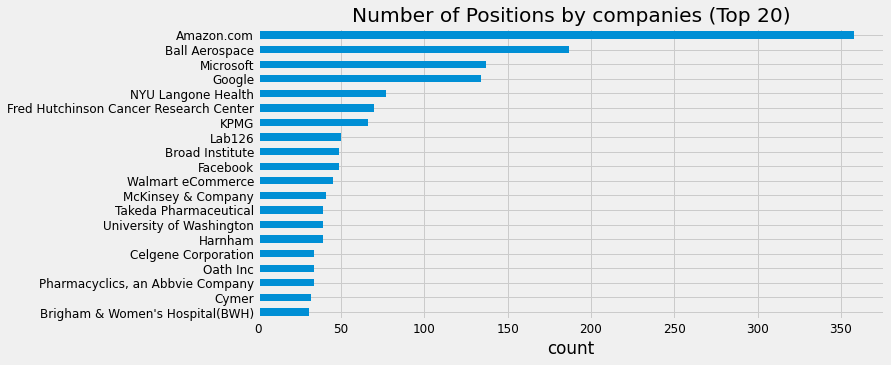

In [18]:
company = df.groupby(['company']).count().sort_values('position').tail(20)
company['position'].plot(kind='barh',figsize=(10,5))
plt.xlabel('count')
plt.ylabel('')
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Number of Positions by companies (Top 20)")
plt.show()

### Positions by City

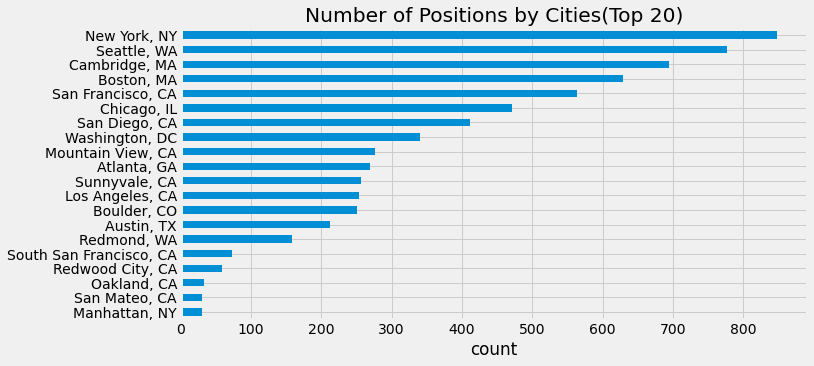

In [21]:
city = df.groupby(['location']).count().sort_values('position').tail(20)
city.position.plot(kind='barh',figsize=(10,5))
plt.xlabel('count')
plt.ylabel('')
plt.title('Number of Positions by Cities(Top 20)')
plt.show()

### Positions by State

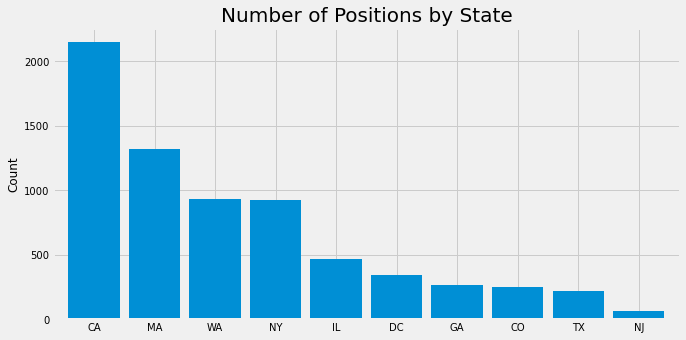

In [22]:
state = df.groupby('state').count().sort_values('position',ascending = False)

state['position'].plot(kind = 'bar',figsize = (10,5) ,width = 0.85)
plt.xlabel('')
plt.ylabel('Count',size = 12)
plt.title('Number of Positions by State', size = 20)
plt.yticks(size = 10)
plt.xticks(size = 10, rotation = 720)
plt.show()

### Position by state and job title

In [42]:
#Group position name in 5 type
data = df.copy()
data['position']=[x.upper() for x in data['position']]
data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'
data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
data.position=['Others' if x is np.nan else x for x in data.position]

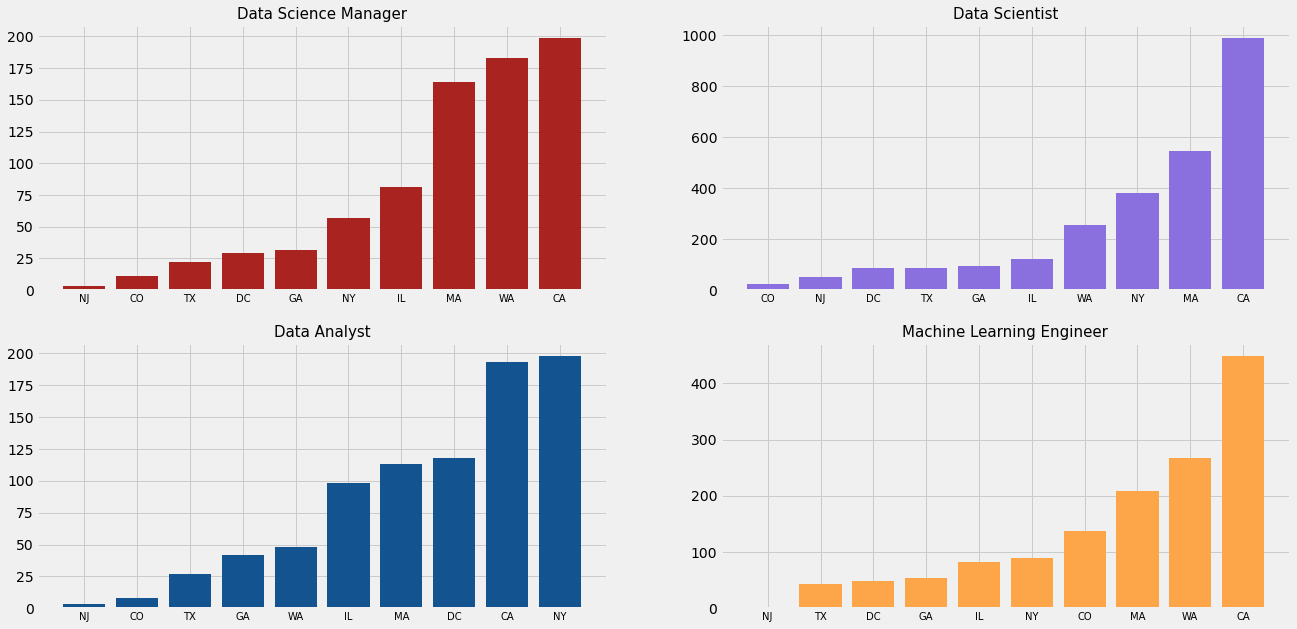

In [43]:
data = data[data['position'] != 'Others']
i = 1
color = ['#A92420','#8A6FDF','#135390','#FDA649']
fig = plt.figure(figsize=(20,10))
for position in data.position.unique():
    x = data[data['position']== str(position)].groupby(['state']).count().sort_values('company')
    plt.subplot(2, 2, i)
    i += 1
    plt.bar(x.index,x['company'], color = color[i-2])
    plt.xlabel('')
    plt.xticks(size = 10)
    plt.title(str(position), size = 15)
plt.show()

### Conclusion
 This project provided me with valuable insights on what the companies are looking for in a data science candidate
 I hope to learn more on how to better in EDA so I can get a better precision on my matches.
